In [ ]:
!pip install pyLDAvis gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.0 MB/s eta 0:00:00


In [ ]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

In [ ]:
import spacy.cli; 
spacy.cli.download("en_core_web_lg"); 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


**Documents without preprocessing**

In [ ]:
nlp = spacy.load("en_core_web_lg")

documents = []
# for line in open("data.json", "r"):
#     documents.append(json.loads(line)["Comment Body"])
with open('data.json', 'r') as file:
    f = json.load(file)
    for line in f: # for each data point, do the following
   #     line_data = f[line]
        text = line["Comment Body"]
        documents.append(text)

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(45, 0.212048733118951), (48, 0.6426355338052969), (49, 0.18850934399762165), (50, 0.3816245434953385), (51, 0.6007344176098035)]


**Documents with preprocessing**

In [ ]:
documents = []
# for line in open("output_full.json", "r"):
#     text = json.loads(line)["commentText"]
#     doc = nlp(text)   
with open('data.json', 'r') as file:
    f = json.load(file)
    for line in f: # for each data point, do the following
   #     line_data = f[line]
        text = line["Comment Body"]
        doc = nlp(text)
        if len(doc) <= 5: # exclude comments with five or less than five words
            pass
        else:
            documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
print(corpus_tfidf[2])

[(18, 0.4453327177245363), (22, 0.40199665186908706), (26, 0.7273948728779799), (27, 0.33312784531009976)]


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

In [ ]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.005*"," + 0.004*"pass" + 0.004*"t" + 0.003*"day" + 0.003*"need"')
(1, '0.005*"," + 0.004*""" + 0.004*"-" + 0.003*"flight" + 0.003*"seat"')
(2, '0.008*"," + 0.004*"-" + 0.003*"good" + 0.003*"upgrade" + 0.003*"flight"')
(3, '0.004*"," + 0.004*"-" + 0.003*"pass" + 0.003*"like" + 0.003*"flight"')
(4, '0.005*"," + 0.005*"pass" + 0.005*"AA" + 0.005*"boarding" + 0.004*"t"')
(5, '0.005*"," + 0.004*"time" + 0.003*"know" + 0.003*"flight" + 0.003*"seat"')
(6, '0.004*"," + 0.004*"flight" + 0.004*"-" + 0.003*"spend" + 0.003*"card"')
(7, '0.004*"," + 0.003*"go" + 0.003*""" + 0.003*"like" + 0.003*"time"')
[(0, 0.536109775247026), (1, 0.5969029690345757), (2, 0.5969029690345757)]
(0, 0.045804776)
(1, 0.67936504)
(2, 0.045804784)
(3, 0.045804784)
(4, 0.04580476)
(5, 0.04580627)
(6, 0.045804776)
(7, 0.045804787)
Definetly the Beef Short Rib :  [(0, 0.045804776), (1, 0.6793651), (2, 0.045804784), (3, 0.045804784), (4, 0.04580476), (5, 0.045806274), (6, 0.045804776), (7, 0.045804787)]


In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/Users/jayshinde/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.4188175334846167


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(2, 50):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

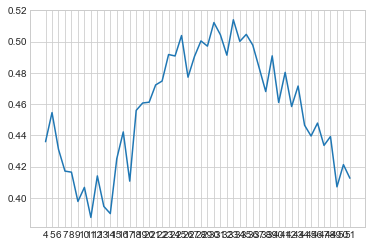

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [ ]:
# Other parameters related to training 
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=?, chunksize=?, passes=?, iterations=?)

### Creating LDA Model with 25 topics (Highest Coherence)

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=25, passes = 10) # train LDA model

In [ ]:
count = 0
for topic in lda_model.show_topics(num_topics=25, num_words=10):# show 10 most important words for each topic
    print(topic)
    count +=1
print(count)

(0, '0.008*"boarding" + 0.006*"pass" + 0.005*"check" + 0.005*"fine" + 0.005*"," + 0.005*"minute" + 0.005*"gate" + 0.004*"attempt" + 0.004*"-" + 0.004*"figure"')
(1, '0.010*"," + 0.008*"bag" + 0.008*"check" + 0.007*"upgrade" + 0.006*"use" + 0.006*"t" + 0.005*"ve" + 0.005*"boarding" + 0.005*"question" + 0.005*"*"')
(2, '0.007*"$" + 0.006*"mile" + 0.004*"t" + 0.004*"1300" + 0.004*"main" + 0.004*"15" + 0.004*"deal" + 0.004*"100" + 0.004*"dirt" + 0.004*"s"')
(3, '0.008*"rib" + 0.007*"short" + 0.007*"…" + 0.006*"-" + 0.005*"well" + 0.005*"say" + 0.005*"fly" + 0.005*"flight" + 0.004*"AA" + 0.004*"logo"')
(4, '0.009*"minute" + 0.008*"delete" + 0.006*"prior" + 0.006*"departure" + 0.006*"boarding" + 0.006*"," + 0.005*"thing" + 0.005*"flight" + 0.005*"15" + 0.005*"day"')
(5, '0.006*"seat" + 0.006*"," + 0.005*"thank" + 0.005*":" + 0.005*"pass" + 0.005*"fit" + 0.004*"ahead" + 0.004*"place" + 0.004*"buy" + 0.004*"follow"')
(6, '0.009*"travel" + 0.008*"agent" + 0.007*"issue" + 0.007*"-" + 0.006*"t" +

In [ ]:
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)

Definetly the Beef Short Rib :  [(0, 0.014655119), (1, 0.014655119), (2, 0.014655119), (3, 0.014655119), (4, 0.014655119), (5, 0.014655119), (6, 0.014655119), (7, 0.014655119), (8, 0.014655119), (9, 0.64827716), (10, 0.014655119), (11, 0.014655119), (12, 0.014655119), (13, 0.014655119), (14, 0.014655119), (15, 0.014655119), (16, 0.014655119), (17, 0.014655119), (18, 0.014655119), (19, 0.014655119), (20, 0.014655119), (21, 0.014655119), (22, 0.014655119), (23, 0.014655119), (24, 0.014655119)]
I had the beef short rib and it was decent, the chicken was super dry and like rubber The vege bowl is ok at best Wife had the salmon and she couldn’t finish it as it said it was just nasty Can’t tell you about the eggplant cause I’m not an eggplant fan :  [(1, 0.82029146)]
I ve never been disappointed with the short rib :  [(0, 0.013757399), (1, 0.013757399), (2, 0.013757399), (3, 0.23668224), (4, 0.013757399), (5, 0.013757399), (6, 0.013757399), (7, 0.013757399), (8, 0.013757399), (9, 0.013757399

Yes Why work at an airport hotel with grumpy travelers when you could work in the fun down town area or perhaps a neighborhood dive I’ve known a few people who’ve worked at PHL and only one lasted long bartending at the airport They also worked another bar job in center city though :  [(10, 0.8169199)]
Why not do both Why limit food service good wages OR good benefits - why can’t they have both :  [(0, 0.01122538), (1, 0.01122538), (2, 0.01122538), (3, 0.01122538), (4, 0.01122538), (5, 0.01122538), (6, 0.01122538), (7, 0.01122538), (8, 0.01122538), (9, 0.01122538), (10, 0.01122538), (11, 0.01122538), (12, 0.01122538), (13, 0.01122538), (14, 0.01122538), (15, 0.7305909), (16, 0.01122538), (17, 0.01122538), (18, 0.01122538), (19, 0.01122538), (20, 0.01122538), (21, 0.01122538), (22, 0.01122538), (23, 0.01122538), (24, 0.01122538)]
nope in the D concourse at LAS only CPK is open until midnight every other venue closes by 10pm

a lot of this is post-pandemic I remember more things being op

TBH it s very rare when we need volunteers though I ve noticed many on this sub love to talk as if every flight is in an oversold situation denying people More often than not I have people hoping they will be needed and I am telling them that unfortunately that I don t need any volunteers :  [(6, 0.10745017), (11, 0.40214273), (15, 0.23652127), (18, 0.12766598)]
Is this an email asking you how much money you d accept to change your flight where it gives you options to select If so, then probably nothing to worry about, they are just saying the flight *might* be overbooked

Or are you flying to from somewhere that is scheduled to have bad weather This wouldn t be asking you to select a monetary amount If that s the case, they are telling you there is a chance something weather related may cause an issue with your flight, and they re trying to offer you options that would hopefully prevent you from being on a delayed cancelled flight And remember, if you have a flight that is cancelled b

In [ ]:
def print_relevant(number):
    for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
        #print(doc, ": ", topic_dist)
        max_value = max(topic_dist, key=lambda x: x[1])[1]
        max_elements = [tup[0] for tup in topic_dist if tup[1] == max_value]
        if max_elements == [number]:
            print(doc, " :  Topic(s)", max_elements)

## Print Relevant comments

In [ ]:
print_relevant(12)

Yup, this happened to me last summer for a flight I had booked from my home airport TRI to HNL Originally routed TRI-DFW-HNL, checked my app one day, now it s showing CLT-DFW-HNL No notification whatsoever from AA Spent HOURS on the phone getting it straightened out My TRI-DFW flight got canceled, and I never got any notice about it, not to mention they totally forgot to rebook the leg from TRI  :  Topic(s) [12]
Awesome thank you for this  :  Topic(s) [12]
Even Chase s trip delay covers very specific reasons -   equipment failure, inclement weather, strike and hijacking skyjacking 

Unless American provides documentation that  another plane at the gate  was due to weather or a mechanical failure, the credit card coverage might not cover it  :  Topic(s) [12]
My first flight thursday was delayed and ultimately cancelled due to weather in DFW Ok I getvthat, there was severe weather

But as soon as the flight was cancelled the crew boarded and the gate agent said the plane was going back t

How is against the CoC I mean I personally would never book that connection But to the average traveler who doesn’t understand the CoC, isn’t the fact that AA sold the ticket enough to make it legal  :  Topic(s) [12]
There s 2 daily to HNL Or you mean if you already picked the later one  :  Topic(s) [12]
